<a href="https://colab.research.google.com/github/syahrezatzy/PEMEROGRAMAN-DASAR/blob/main/PERTEMUAN_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('/content/orders.csv')


In [10]:

df.describe()

#rata-rata
rata_rata_payment = df['payment'].mean()
print("Rata-rata payment:", rata_rata_payment)

#modus
modus_customer = df['customer_id'].mode()
print("Modus customer_id:", modus_customer)


Rata-rata payment: 33972.936
Modus customer_id: 0    571
Name: customer_id, dtype: int64


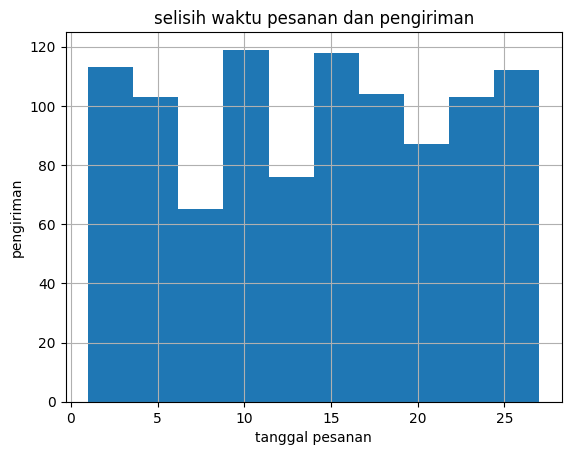

In [11]:

df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])
df['shipping_days'] = (df['delivery_date'] - df['order_date']).dt.days

df['shipping_days'].hist()
plt.title("selisih waktu pesanan dan pengiriman")
plt.xlabel("tanggal pesanan")
plt.ylabel("pengiriman")
plt.show()

In [12]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])
df['shipping_days'] = (df['delivery_date'] - df['order_date']).dt.days

corr_matrix = df[['customer_id', 'payment', 'shipping_days']].corr()
print("Korelasi:\n", corr_matrix)

cov_matrix = df[['customer_id', 'payment', 'shipping_days']].cov()
print("Kovarian:\n", cov_matrix)


Korelasi:
                customer_id   payment  shipping_days
customer_id       1.000000 -0.018983       0.065952
payment          -0.018983  1.000000      -0.042244
shipping_days     0.065952 -0.042244       1.000000
Kovarian:
                 customer_id       payment  shipping_days
customer_id    76793.001401 -7.602068e+04     140.858939
payment       -76020.677718  2.088490e+08   -4705.265273
shipping_days    140.858939 -4.705265e+03      59.401317


In [13]:
#kolom kategori
df['Kategori_Payment'] = df['payment'].apply(lambda x: 'Mahal' if x >= 30000 else 'Murah')
df

#rata rata dari groupby
df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])
df['shipping_days'] = (df['delivery_date'] - df['order_date']).dt.days

# Agregasi lengkap
group_mean = df.groupby('Kategori_Payment')['shipping_days'].mean()
print(group_mean)



Kategori_Payment
Mahal    13.696335
Murah    14.590164
Name: shipping_days, dtype: float64
